In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('npl_matches.csv')
df.head()

,id,season,date,venue,city,team_1,team_2,toss_winner,toss_decision,result,...,team_1_wickets,team_2_wickets,team_1_runs_from_extra,team_2_runs_from_extra,win_by_runs,win_by_wickets,player_of_the_match,over_balls,extra_balls,total_ball_bowled
0,1,2024,11/30/2024,Tribhuvan University International Cricket Gro...,Kathmandu,Biratnagar Kings,Janakpur Bolts,Janakpur Bolts,field,normal,...,10,2,15,22,0,8,Lahiru Milantha,207,17,224
1,2,2024,12/2/2024,Tribhuvan University International Cricket Gro...,Kathmandu,Kathmandu Gurkhas,Chitwan Rhinos,Chitwan Rhinos,field,normal,...,9,5,8,12,0,5,Sohail Tanvir,223,5,228
2,3,2024,12/2/2024,Tribhuvan University International Cricket Gro...,Kathmandu,Karnali Yaks,Janakpur Bolts,Karnali Yaks,bat,normal,...,7,2,8,4,0,8,Anil Sah,211,11,222
3,4,2024,12/3/2024,Tribhuvan University International Cricket Gro...,Kathmandu,Sudurpaschim Royals,Biratnagar Kings,Biratnagar Kings,field,normal,...,7,10,7,7,90,0,Dipendra Singh Airee,217,9,226
4,5,2024,12/3/2024,Tribhuvan University International Cricket Gro...,Kathmandu,Chitwan Rhinos,Pokhara Avengers,Pokhara Avengers,field,normal,...,7,10,5,11,87,0,Rijan Dhakal,200,9,209


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32 non-null     int64  
 1   season                  32 non-null     int64  
 2   date                    32 non-null     object 
 3   venue                   32 non-null     object 
 4   city                    32 non-null     object 
 5   team_1                  32 non-null     object 
 6   team_2                  32 non-null     object 
 7   toss_winner             32 non-null     object 
 8   toss_decision           32 non-null     object 
 9   result                  32 non-null     object 
 10  dls_applied             32 non-null     int64  
 11  super_over              32 non-null     int64  
 12  winner                  32 non-null     object 
 13  team_1_runs             32 non-null     int64  
 14  team_2_runs             32 non-null     int6

In [7]:
print(f'Rows are {df.shape[0]}  and Columns are {df.shape[1]}')

Rows are 32  and Columns are 27


In [9]:
df.isnull().sum()

id                        0
season                    0
date                      0
venue                     0
city                      0
team_1                    0
team_2                    0
toss_winner               0
toss_decision             0
result                    0
dls_applied               0
super_over                0
winner                    0
team_1_runs               0
team_2_runs               0
team_1_overs_played       0
team_2_overs_played       0
team_1_wickets            0
team_2_wickets            0
team_1_runs_from_extra    0
team_2_runs_from_extra    0
win_by_runs               0
win_by_wickets            0
player_of_the_match       0
over_balls                0
extra_balls               0
total_ball_bowled         0
dtype: int64

In [15]:
df.columns

Index(['id', 'season ', 'date', 'venue', 'city', 'team_1', 'team_2',
       'toss_winner', 'toss_decision', 'result', 'dls_applied', 'super_over',
       'winner', 'team_1_runs', 'team_2_runs', 'team_1_overs_played',
       'team_2_overs_played', 'team_1_wickets', 'team_2_wickets',
       'team_1_runs_from_extra', 'team_2_runs_from_extra', 'win_by_runs',
       'win_by_wickets', 'player_of_the_match', 'over_balls', 'extra_balls',
       'total_ball_bowled'],
      dtype='object')

In [ ]:
# Who won the most matches?

In [18]:
match_wins

winner
Janakpur Bolts         7
Sudurpaschim Royals    7
Karnali Yaks           5
Chitwan Rhinos         4
Kathmandu Gurkhas      4
Biratnagar Kings       2
Pokhara Avengers       2
Lumbini Lions          1
Name: count, dtype: int64

Text(0.5, 1.0, 'Most match win by teams')

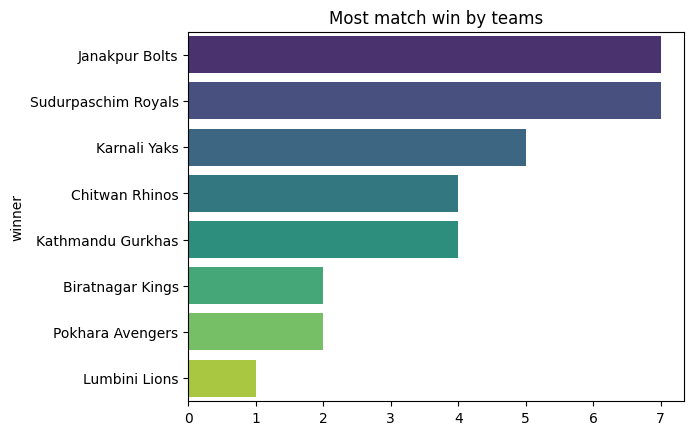

In [23]:
match_wins = df['winner'].value_counts()
sns.barplot(y = match_wins.index, x = match_wins.values, palette = 'viridis')
plt.title('Most match win by teams')

In [24]:
# Toss decision trends

Text(0.5, 1.0, 'Toss Decision Trends')

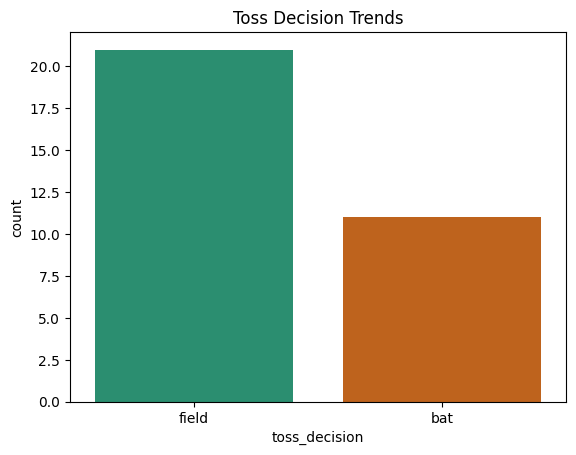

In [30]:
sns.countplot(x = df['toss_decision'],palette = 'Dark2')
plt.title('Toss Decision Trends')

In [39]:
# whats the win rate percentages of teams that won both toss and match?
count = df[df['toss_winner'] == df['winner']]['id'].count()
percentage = (count * 100)/df.shape[0]
percentage.round(2)

np.float64(43.75)

Text(0.5, 1.0, 'Comparison of Wins by Runs vs Wickets')

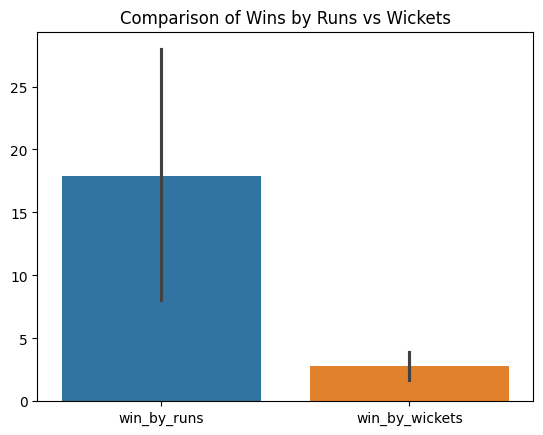

In [54]:
# how so teams won(run or wickets)?
sns.barplot(data =df[['win_by_runs', 'win_by_wickets']])
plt.title("Comparison of Wins by Runs vs Wickets")

In [56]:
# Most player of the matches
df.columns

Index(['id', 'season ', 'date', 'venue', 'city', 'team_1', 'team_2',
       'toss_winner', 'toss_decision', 'result', 'dls_applied', 'super_over',
       'winner', 'team_1_runs', 'team_2_runs', 'team_1_overs_played',
       'team_2_overs_played', 'team_1_wickets', 'team_2_wickets',
       'team_1_runs_from_extra', 'team_2_runs_from_extra', 'win_by_runs',
       'win_by_wickets', 'player_of_the_match', 'over_balls', 'extra_balls',
       'total_ball_bowled', 'win_type'],
      dtype='object')

In [63]:
count = df['player_of_the_match'].value_counts().head(5)
count

player_of_the_match
William Bosisto         3
James Neesham           2
Lahiru Milantha         2
Dipendra Singh Airee    2
Anil Sah                1
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 players with man of the matche')

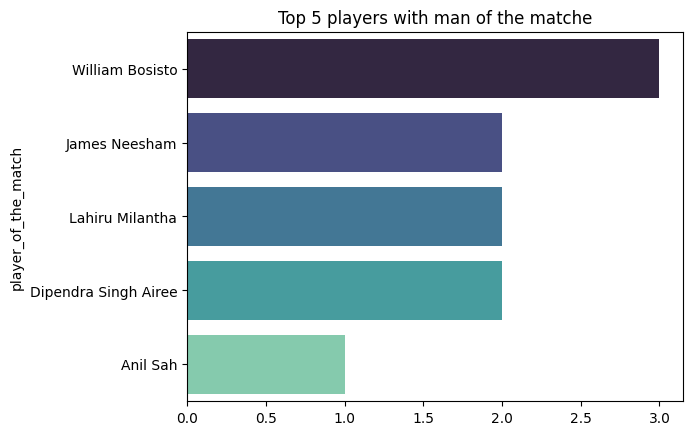

In [69]:
sns.barplot(x = count.values, y = count.index, palette = 'mako')
plt.title('Top 5 players with man of the matche')

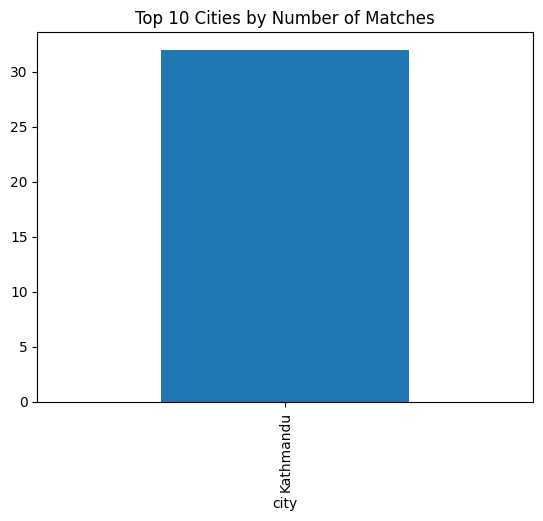

In [80]:
# Which Cities Host Most Matches?
df['city'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Cities by Number of Matches")
plt.show()

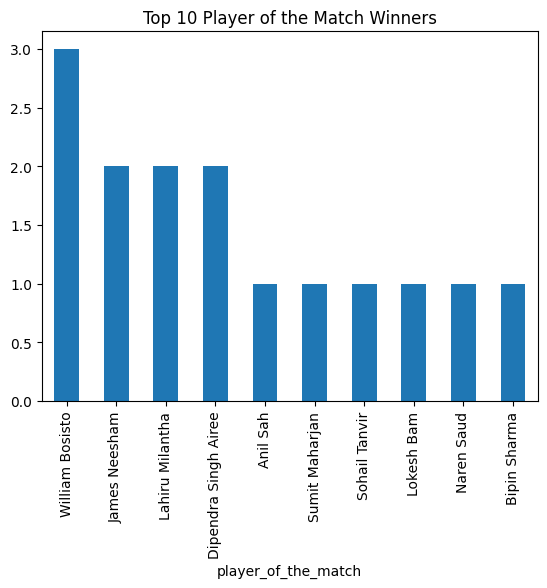

In [81]:
# Player of the Match – Top Performers
df['player_of_the_match'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Player of the Match Winners")
plt.show()


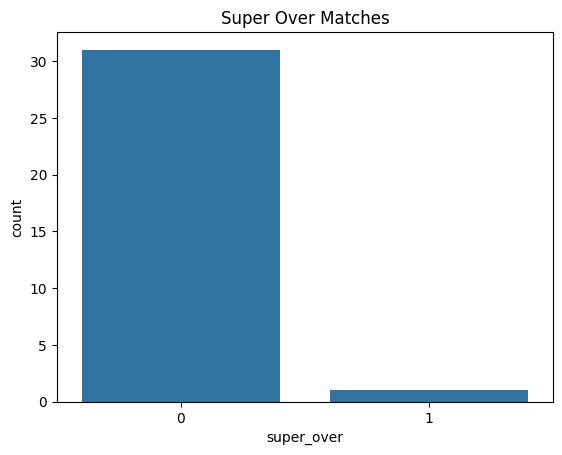

In [82]:
# Were Super Overs Common?
sns.countplot(x='super_over', data=df)
plt.title("Super Over Matches")
plt.show()

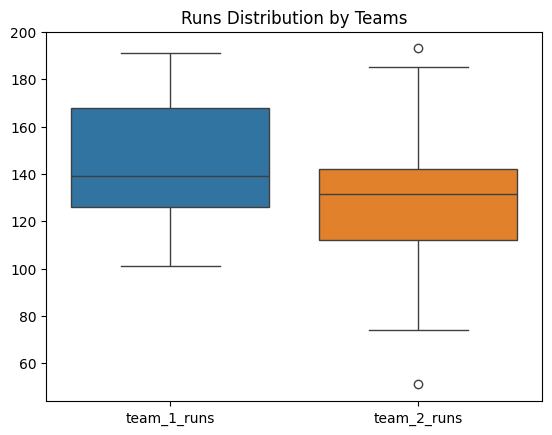

In [83]:
# Runs Scored by Teams (Easy Comparison)
sns.boxplot(data=df[['team_1_runs','team_2_runs']])
plt.title("Runs Distribution by Teams")
plt.show()
